In [2]:
import pandas as pd

df = pd.read_csv('bike+sharing+dataset/day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df = df.drop(['dteday','instant'], axis=1)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

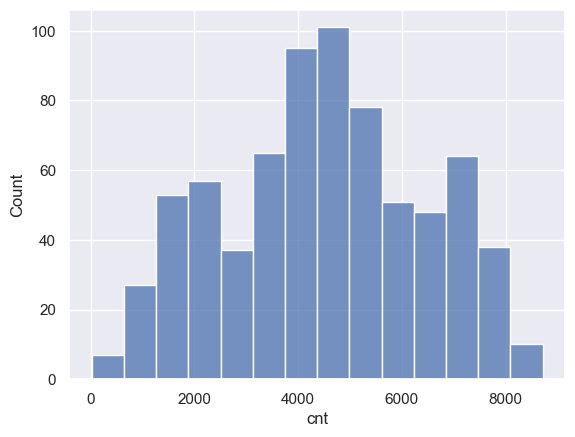

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['cnt'])

In [6]:
x = df.drop(['cnt', 'casual', 'registered'], axis=1)
y = df['cnt']

In [7]:
corr_matrix = df.corr()
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
base_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_grid = {
    'max_depth': [6, 4, 5],           
    'learning_rate': [ 0.082, 0.083, 0.084],  
    'n_estimators': [137, 133, 135],    
    'subsample': [0.65,0.67, 0.69],            
    'colsample_bytree': [1.0]     
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=1
)
# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=6, n_estimators=137, subsample=0.67; total time=  

[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=133, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=133, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=133, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=135, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=135, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=135, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=135, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_depth=4, n_estimators=135, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.082, max_

[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=137, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=6, n_estimators=133, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_

[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_depth=4, n_estimators=135, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.083, max_

[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=6, n_estimators=133, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_

[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=4, n_estimators=135, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=4, n_estimators=135, subsample=0.69; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=5, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=5, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=5, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=5, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=5, n_estimators=137, subsample=0.65; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_depth=5, n_estimators=137, subsample=0.67; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.084, max_

In [18]:
final_model = grid_search.best_estimator_
print(final_model.get_params())
y_pred = final_model.predict(X_test_scaled)

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.083, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 5, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 135, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.67, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 389.91702706473217
Mean Squared Error: 349633.46955452603
R-squared: 0.9128070490872094


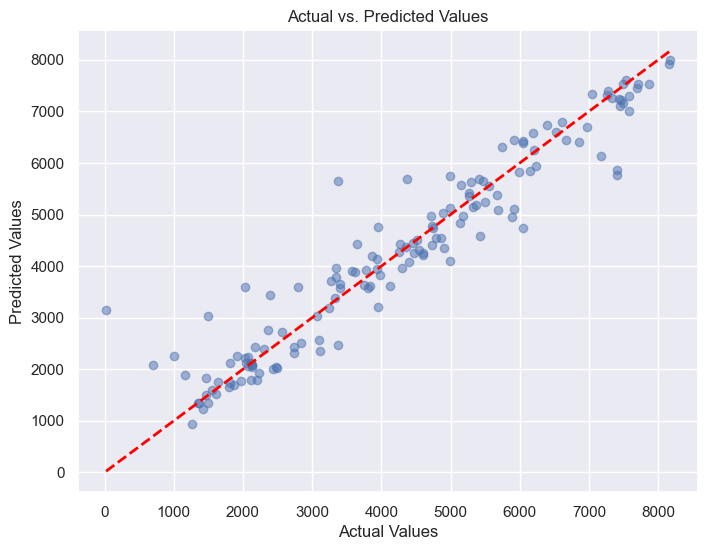

In [20]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()